In [441]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [442]:
data = pd.read_csv("Neighborhood_MedianValuePerSqft_AllHomes.csv")

In [443]:
print(data.head(5))

   RegionID        RegionName         City State  \
0    274772  Northeast Dallas       Dallas    TX   
1    192689          Paradise    Las Vegas    NV   
2    112345          Maryvale      Phoenix    AZ   
3    270958   Upper West Side     New York    NY   
4     27080      Sherman Oaks  Los Angeles    CA   

                            Metro   CountyName  SizeRank  1996-04  1996-05  \
0               Dallas-Fort Worth       Dallas         1      NaN      NaN   
1                       Las Vegas        Clark         2     75.0     74.0   
2                         Phoenix     Maricopa         3     43.0     44.0   
3                        New York     New York         4      NaN      NaN   
4  Los Angeles-Long Beach-Anaheim  Los Angeles         5    124.0    125.0   

   1996-06   ...     2016-08  2016-09  2016-10  2016-11  2016-12  2017-01  \
0      NaN   ...         159      160      162      163      163      163   
1     74.0   ...         120      120      120      121      122

In [444]:
data.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01',
       '2017-02', '2017-03', '2017-04', '2017-05'],
      dtype='object', length=261)

In [445]:
list(data.dtypes)

[dtype('int64'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('O'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('

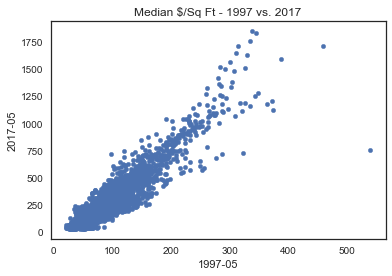

In [446]:
ax=data.plot(x='1997-05',y='2017-05',kind='scatter')
ax.set_title("Median $/Sq Ft - 1997 vs. 2017")
plt.savefig('scatter.png')
plt.show()

#There are three notable divergences
#1) markets that did extremely well in those 20 years - Silicon Valley and Manhattan
#2) markets that did okay - a handful of SF ones like Nob Hill, Telegraph Hill
#3) markets that lagged compared to other high priced ones in 1997 

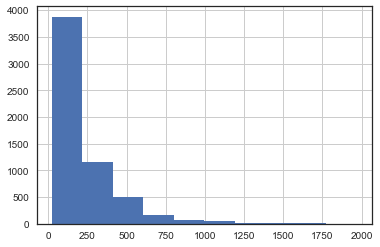

In [447]:
data['2017-05'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1301080f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x130a799b0>]], dtype=object)

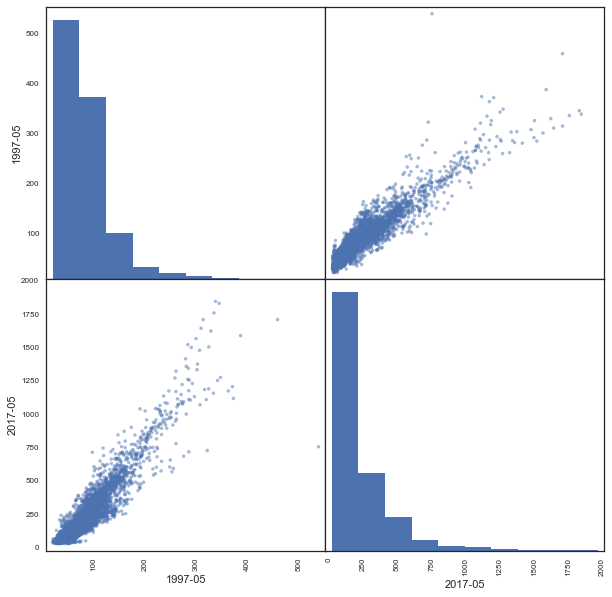

In [448]:
import pandas.plotting as pdt
pdt.scatter_matrix(data[['1997-05', '2017-05']], figsize=(10,10))
#Histograms below show that price distriubtions got more unequal in the 20 years since 1997.
#While the distributions got more unequal, the overall median prices rose quite a lot, with the bottom 
#bin's top limit increasing from $100 to $250.
#In 2017, a greater proportion of regions fall in the bottom bin, and a select few regions capture enormous gains.

In [449]:
#Divergence 1) What are those regions at the top?
top_regions=data[data['2017-05']>1250]
top_regions['City'].value_counts()
#It is basically entirely Silicon Valley and New York (Manhattan). 

Palo Alto        16
New York         11
San Francisco     4
Menlo Park        4
Naples            2
Name: City, dtype: int64

In [450]:
data[(data['2017-05']>750) & (data['2017-05']<1300) & (data['1996-05']>300)]
#Divergence 2) within San Francisco 

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05
553,268337,Nob Hill,San Francisco,CA,San Francisco,San Francisco,554,304.0,309.0,308.0,...,1158,1148,1144,1151,1158,1154,1151,1152,1156,1158
726,268450,Russian Hill,San Francisco,CA,San Francisco,San Francisco,727,311.0,323.0,329.0,...,1176,1171,1173,1184,1193,1191,1187,1192,1202,1207
895,274422,Marina,San Francisco,CA,San Francisco,San Francisco,896,310.0,309.0,309.0,...,1281,1275,1270,1272,1274,1270,1265,1268,1273,1276
1612,268517,Telegraph Hill,San Francisco,CA,San Francisco,San Francisco,1613,311.0,316.0,320.0,...,1119,1115,1116,1123,1130,1128,1123,1121,1122,1119
3184,268156,Financial District,San Francisco,CA,San Francisco,San Francisco,3185,315.0,312.0,309.0,...,1196,1182,1177,1188,1195,1189,1179,1179,1179,1175
5450,275340,Shady Canyon,Irvine,CA,Los Angeles-Long Beach-Anaheim,Orange,5451,537.0,537.0,537.0,...,763,766,767,769,767,764,762,760,758,756


In [451]:
data[(data['2017-05']>500) & (data['2017-05']<700) & (data['1996-05']>200)]['City'].value_counts() 
#Divergence 2) within Honolulu. Honolulu prices were among the highest in 1997, but they did not rise nearly
#as much as Silicon Valley, Manhattan, and SF.

Honolulu      10
Great Neck     1
Greenwich      1
Name: City, dtype: int64

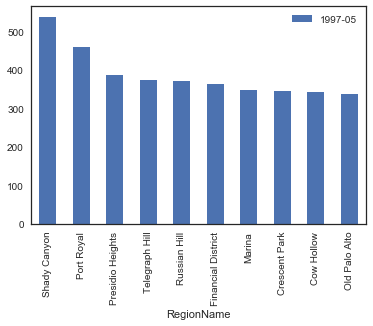

In [452]:
#What were the most expensive markets in 1997? 
sorted_1997=data.sort_values("1997-05", ascending=False)
sorted_2017=data.sort_values('2017-05', ascending=False)

sorted_1997[:10].plot.bar(x='RegionName',y='1997-05') 

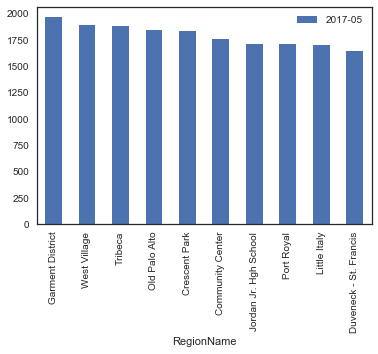

In [453]:
#In 2017?
sorted_2017[:10].plot.bar(x='RegionName',y='2017-05') 

In [454]:
sustained=[]
for x in sorted_1997['RegionName'][0:30].values:
    if x in sorted_2017['RegionName'][0:30].values:
        sustained.append(x)      
sustained
#These markets were in the top 30 in 1997 and remained in the top 30 in 2017.

['Port Royal',
 'Presidio Heights',
 'Financial District',
 'Crescent Park',
 'Old Palo Alto',
 'Community Center',
 'College Terrace',
 'Central Menlo Park',
 'Jordan Jr. Hgh School',
 'Duveneck - St. Francis',
 'Barron Park',
 'Allied Arts',
 'Downtown North',
 'Ventura',
 'Midtown']

In [455]:
data_cleaned=data.dropna()
data_cleaned.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05
1,192689,Paradise,Las Vegas,NV,Las Vegas,Clark,2,75.0,74.0,74.0,...,120,120,120,121,122,123,124,125,126,126
2,112345,Maryvale,Phoenix,AZ,Phoenix,Maricopa,3,43.0,44.0,44.0,...,102,103,104,105,106,107,107,107,108,108
4,27080,Sherman Oaks,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,5,124.0,125.0,126.0,...,487,490,494,499,503,505,508,510,512,513
5,118208,South Los Angeles,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,6,91.0,92.0,93.0,...,309,312,316,320,323,327,331,336,339,342
6,192820,Sunrise Manor,Las Vegas,NV,Las Vegas,Clark,7,66.0,67.0,67.0,...,107,107,107,108,109,110,110,111,111,112


In [456]:
len(data)

5879

In [457]:
len(data_cleaned)

4280

In [458]:
#Add Column with Pct Change between May 1997 and May 2017
data_cleaned_pct=data_cleaned.assign(Pct_Change = 100*(data_cleaned['2017-05'] - data_cleaned['1997-05']) / data_cleaned['1997-05'])

In [459]:
sorted_pct=data_cleaned_pct.sort_values('Pct_Change', ascending=False)
sorted_pct[['RegionName','City','Pct_Change']][0:30]

,RegionName,City,Pct_Change
318,Downtown,Jersey City,628.571429
5861,Passyunk Square,Philadelphia,554.054054
1125,The Waterfront,Jersey City,526.890756
706,Fishtown,Philadelphia,511.764706
2355,Longfellow,Oakland,500.990099
1785,Bushrod,Oakland,475.000000
405,Echo Park,Los Angeles,474.336283
665,Kenmore,Boston,470.945946
293,Downtown,Los Angeles,469.230769
533,Central City East,Los Angeles,464.705882


In [460]:
#One problem w the cleaned data is that it dropped any rows with missing columns, so we might exclude important markets

In [461]:
sorted_pct['City'][0:30].value_counts()

Los Angeles     6
Palo Alto       5
Oakland         5
Portland        4
Boston          4
Philadelphia    3
Jersey City     2
Baltimore       1
Name: City, dtype: int64

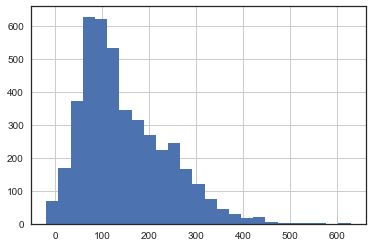

In [462]:
sorted_pct['Pct_Change'].hist(bins=25)

In [463]:
#Creating function that takes a regionName and creates pandas Series with Dates (Index) and Price/Sq Ft (Values)

def region_series(regionName):
    regionSeries=pd.Series(data=data[data['RegionName']==regionName].values.ravel()[7:],index=data.columns[7:])
    return regionSeries

def region_series_date(regionName):
    regionSeries = pd.Series(data=data[data['RegionName']==regionName].values.ravel()[7:],index=pd.date_range('4/1/1996', periods=254, freq='MS'))
    return regionSeries


In [464]:
city_list=['Chicago','New York','San Diego','Los Angeles','Washington','Seattle','Atlanta','San Francisco','Palo Alto','Detroit','Austin','Pittsburgh']

In [465]:
region_list=['Tribeca','Pacific Heights','Shadyside','Eight Mile Wyoming','DUMBO','Sherman Oaks']

In [466]:
tribeca_date = region_series_date('Tribeca')
uws_date = region_series_date('Upper West Side')

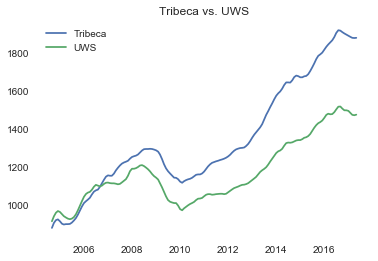

In [467]:
fig, ax = plt.subplots()

ax.plot(tribeca_date.index, tribeca_date.values, label='Tribeca')
ax.plot(uws_date.index, uws_date.values, label='UWS')
ax.tick_params(bottom="off", top="off", left="off", right="off")

for spine in ax.spines:
    ax.spines[spine].set_visible(False)

ax.legend(loc='upper left')
ax.set_title('Tribeca vs. UWS')
plt.show()



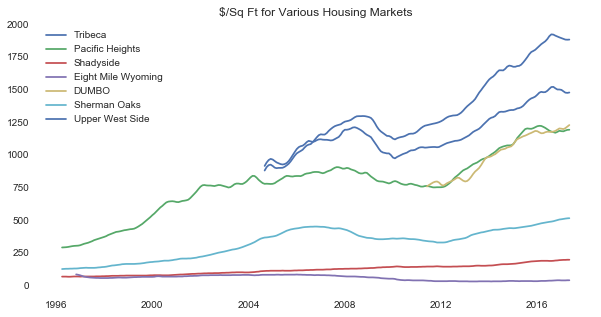

In [468]:
region_list=['Tribeca','Pacific Heights','Shadyside','Eight Mile Wyoming','DUMBO','Sherman Oaks','Upper West Side']

fig, ax = plt.subplots(figsize=(10,5))

for region in region_list:
    series=region_series_date(region)
    ax.plot(series.index, series.values, label=region)
    

ax.tick_params(bottom="off", top="off", left="off", right="off")

for spine in ax.spines:
    ax.spines[spine].set_visible(False)

ax.legend(loc='upper left')
ax.set_title('$/Sq Ft for Various Housing Markets')

fig.savefig('various_markets.png')
plt.show()


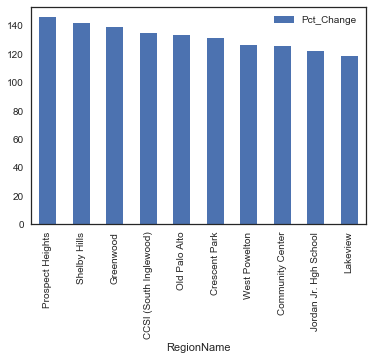

In [469]:
data_pct_2007=data.assign(Pct_Change = 100* (data['2017-05'] - data['2007-05']) / data['2007-05'])
sorted_pct_2007=data_pct_2007.sort_values('Pct_Change', ascending=False)
#sorted_pct_2007[0:100]
#sorted_pct_2007['City'][0:100].value_counts()
#Markets w largest % gains since 2007

sorted_pct_2007[:10].plot.bar(x='RegionName',y='Pct_Change') 

In [470]:
data_pct_2013=data.assign(Pct_Change = 100* (data['2017-05'] - data['2013-05']) / data['2013-05'])
sorted_pct_2013=data_pct_2013.sort_values('Pct_Change', ascending=False)
sorted_pct_2013[0:100]
#sorted_pct_2010['City'][0:100].value_counts()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,Pct_Change
2764,276365,Harrington,Oakland,CA,San Francisco,Alameda,2765,95.0,95.0,94.0,...,430,432,433,435,438,443,448,450,452,127.135678
2143,275543,St. Elizabeth,Oakland,CA,San Francisco,Alameda,2144,NaN,NaN,NaN,...,396,401,408,415,420,425,432,440,446,124.120603
1858,57189,Lemmon Valley,Reno,NV,Reno,Washoe,1859,89.0,89.0,88.0,...,176,177,178,179,181,182,183,184,186,121.428571
2883,273166,CCSI (South Inglewood),Nashville,TN,Nashville,Davidson,2884,44.0,45.0,45.0,...,176,178,179,181,183,187,190,196,202,117.204301
2995,416887,Oak Park,Stockton,CA,Stockton,San Joaquin,2996,71.0,71.0,71.0,...,162,164,166,169,172,174,176,178,180,116.867470
3443,268087,Colonial Village,Sacramento,CA,Sacramento,Sacramento,3444,68.0,68.0,67.0,...,202,205,208,213,219,220,220,223,226,115.238095
1766,268659,Elyria Swansea,Denver,CO,Denver,Denver,1767,NaN,NaN,NaN,...,240,244,248,252,258,263,265,266,269,115.200000
2265,115216,Fruitridge Manor,Sacramento,CA,Sacramento,Sacramento,2266,67.0,67.0,67.0,...,182,185,186,188,189,191,196,199,200,115.053763
3491,273517,Durrs Homeowners,Fort Lauderdale,FL,Miami-Fort Lauderdale,Broward,3492,NaN,NaN,NaN,...,114,116,118,119,120,122,126,131,135,114.285714
5043,343602,Old City,Oakland,CA,San Francisco,Alameda,5044,NaN,NaN,NaN,...,639,651,659,662,667,671,673,675,677,113.564669


In [471]:
tri['2017-05']

653    1880
Name: 2017-05, dtype: int64

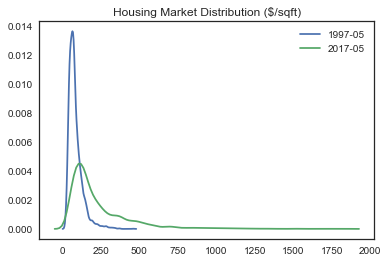

In [472]:
import seaborn as sns 
data_dropped=data.dropna()
sns.set_style('white')
sns.kdeplot(data_dropped['1997-05'])
#sns.kdeplot(data_dropped['2007-05'])
sns.kdeplot(data_dropped['2017-05'])

plt.title("Housing Market Distribution ($/sqft)")
plt.show()

In [473]:
states=['CA','NY','PA']
data_dropped_state=data_dropped[data_dropped['State'].isin(states)]
len(data_dropped_state)

971

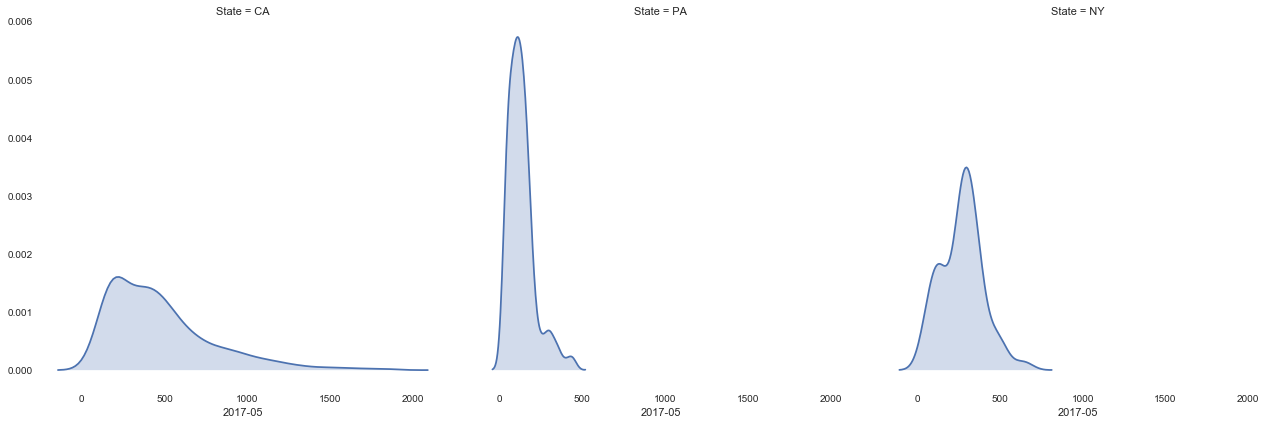

In [474]:
sns.set_style('white')
facet = sns.FacetGrid(data_dropped_state, col='State', size=6)
facet.map(sns.kdeplot, '2017-05', shade=True) 
sns.despine(left=True, bottom=True)
plt.savefig('KDEPlots.png')
plt.show()


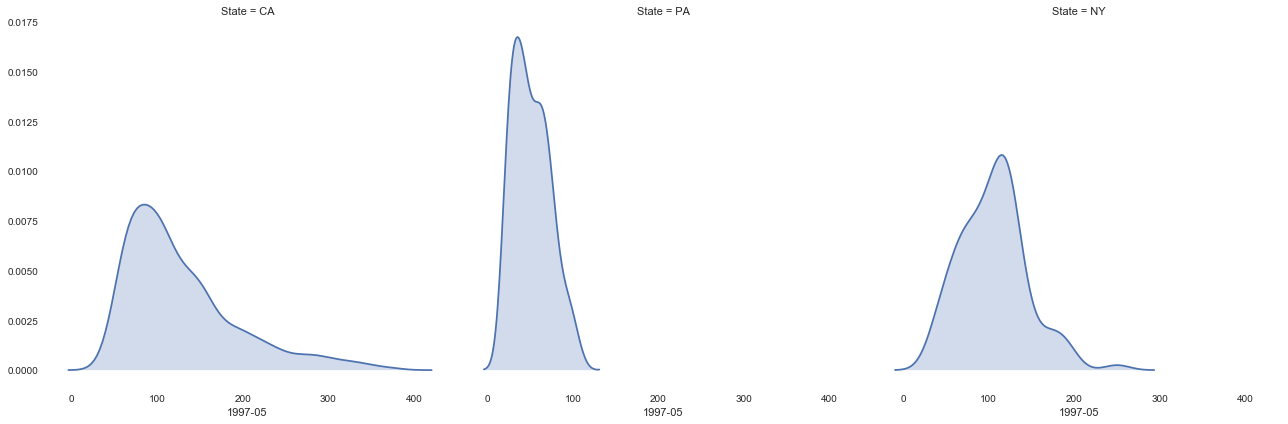

In [475]:
sns.set_style('white')
facet = sns.FacetGrid(data_dropped_state, col='State', size=6)
facet.map(sns.kdeplot, '1997-05', shade=True) 
sns.despine(left=True, bottom=True)
#plt.savefig('KDEPlots2000.png')
plt.show()

In [499]:
metro=data.groupby('Metro', as_index=False).agg(np.mean)
metro=metro.sort_values('2017-05', ascending=False)
metro[0:20]

,Metro,RegionID,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05
99,San Jose,339858.613636,1889.522727,208.738095,209.023810,209.428571,210.261905,211.190476,212.214286,213.619048,...,987.931818,987.431818,990.000000,992.181818,996.977273,1005.068182,1012.931818,1018.795455,1026.568182,1033.840909
98,San Francisco,311231.451613,2637.202765,172.263473,172.958084,173.562874,173.964072,174.497006,175.083832,175.772455,...,707.267281,709.884793,712.470046,716.608295,721.368664,725.129032,728.599078,733.207373,737.714286,741.188940
100,Santa Maria-Santa Barbara,387076.578947,3783.684211,191.000000,190.545455,190.181818,190.272727,191.181818,192.636364,193.818182,...,702.263158,705.263158,708.526316,710.578947,713.368421,715.684211,715.631579,714.157895,711.736842,708.631579
70,Naples,253339.000000,4287.384615,166.333333,167.000000,167.750000,167.916667,167.416667,166.833333,166.750000,...,582.384615,589.615385,594.692308,597.769231,601.076923,601.923077,599.769231,595.769231,590.461538,584.846154
117,Urban Honolulu,266400.222222,583.722222,248.722222,246.166667,243.611111,241.777778,239.611111,237.722222,236.444444,...,561.000000,561.611111,564.888889,568.833333,570.944444,572.777778,576.166667,580.111111,582.500000,584.444444
17,Boston,185491.744186,1392.418605,133.119048,133.119048,133.380952,133.738095,134.000000,134.309524,134.880952,...,528.651163,532.697674,536.697674,540.651163,544.906977,549.209302,554.186047,558.906977,563.604651,567.651163
59,Los Angeles-Long Beach-Anaheim,246988.402439,1673.813008,128.966184,128.971014,128.917874,128.980676,129.014493,129.193237,129.396135,...,465.394309,467.475610,471.052846,475.166667,478.158537,479.617886,481.056911,482.995935,485.317073,487.536585
120,Washington,220970.567742,2745.535484,131.813559,130.796610,130.067797,129.491525,129.067797,128.898305,128.728814,...,424.367742,426.535484,428.612903,431.038710,434.806452,440.838710,446.522581,448.393548,446.690323,444.967742
75,New York,181084.503401,1654.278912,105.211679,105.416058,105.496350,105.518248,105.437956,105.437956,105.474453,...,410.421769,413.010204,415.336735,417.867347,419.989796,421.329932,423.088435,426.238095,430.030612,433.513605
18,Boulder,415248.375000,4264.458333,120.541667,120.375000,120.625000,120.666667,120.750000,121.125000,121.333333,...,397.208333,402.500000,407.166667,411.833333,415.416667,417.666667,422.458333,428.708333,430.750000,429.625000


In [500]:
data[data['Metro']=='New York']


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05
3,270958,Upper West Side,New York,NY,New York,New York,4,NaN,NaN,NaN,...,1517,1518,1507,1498,1498,1495,1484,1474,1472,1475
7,194430,East New York,New York,NY,New York,Kings,8,NaN,NaN,NaN,...,296,299,303,308,312,317,320,323,329,334
12,198687,Washington Heights,New York,NY,New York,New York,13,NaN,NaN,NaN,...,691,702,706,707,708,709,707,705,708,715
14,272816,Astoria,New York,NY,New York,Queens,15,NaN,NaN,NaN,...,615,617,623,635,647,661,682,703,717,726
17,199001,Williamsburg,New York,NY,New York,Kings,18,NaN,NaN,NaN,...,922,932,937,946,962,973,974,978,983,989
18,272902,Bedford Stuyvesant,New York,NY,New York,Kings,19,NaN,NaN,NaN,...,648,659,663,667,671,673,671,674,680,688
22,194737,Flatbush,New York,NY,New York,Kings,23,NaN,NaN,NaN,...,521,531,537,540,547,551,552,557,562,564
23,403222,Crown Heights,New York,NY,New York,Kings,24,NaN,NaN,NaN,...,564,574,585,597,606,608,605,610,621,631
25,25294,Jamaica,New York,NY,New York,Queens,26,NaN,NaN,NaN,...,326,330,334,336,337,336,340,345,349,351
27,270828,East Harlem,New York,NY,New York,New York,28,NaN,NaN,NaN,...,965,974,975,978,983,989,998,1005,1016,1032
